In [2]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

import graphviz 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import top_k_accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.decomposition import PCA

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import f1_score

In [4]:
#enade_treino = pd.read_csv("../../tabelas_cursos/tabela_final_SI_11-14_treinamento.csv")
# enade_treino = pd.read_csv("../../concept_drift/tabelas_finais/tabela_final_2017_treinamento.csv")
enade_treino = pd.read_csv("../../concept_drift/criterios_divisao/Publico_Privado/cursos_grad_publicos_2014.csv")

columns_drop = ['Privada CFL', 'Privada SFL', 'Pública Federal', 'Pública Estadual', 'Pública Municipal']
enade_treino.drop(columns_drop, axis=1, inplace=True)

numero_caracteristicas = enade_treino.shape[1] - 1
X_enade_treino = enade_treino.iloc[:, 0:numero_caracteristicas]
y_enade_treino = enade_treino.iloc[:, -1]

In [5]:
#enade_teste = pd.read_csv("../../tabelas_cursos/tabela_final_SI_2017_treinamento.csv")
# enade_teste = pd.read_csv("../../concept_drift/criterios_divisao/cursos_Grad_publicos_2017.csv")
enade_teste = pd.read_csv("../../concept_drift/criterios_divisao/Publico_Privado/cursos_grad_publicos_2017.csv")

columns_drop = ['Privada CFL', 'Privada SFL', 'Pública Federal', 'Pública Estadual', 'Pública Municipal']
enade_teste.drop(columns_drop, axis=1, inplace=True)

numero_caracteristicas = enade_teste.shape[1] - 1
X_enade_teste = enade_teste.iloc[:, 0:numero_caracteristicas]
y_enade_teste = enade_teste.iloc[:, -1]

In [10]:
enade_treino

,Codigo_do_Curso,Numero_Notas_Invalidas,Numero_Faltantes,Numero_Participantes,ADS,BCC,EC,GTI,LCC,RC,...,Não contribui_Plano_de_Ensino,Não sei responder_Plano_de_Ensino,nulos_Formacao,Muito boa_Formacao,Boa_Formacao,Regular_Formacao,Fraca_Formacao,Muito fraca_Formacao,Não sei responder_Formacao,Nota_Conceito_Faixa
0,36,0.0,0.250000,0.750000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.062500,0.000000,0.125000,0.125000,0.375000,0.375000,0.000000,0.000000,0.000000,4
1,127,0.0,0.142857,0.857143,0.0,1.0,0.0,0.0,0.0,0.0,...,0.214286,0.000000,0.071429,0.214286,0.214286,0.357143,0.071429,0.071429,0.000000,4
2,317,0.0,0.232143,0.767857,0.0,1.0,0.0,0.0,0.0,0.0,...,0.160714,0.000000,0.196429,0.196429,0.232143,0.250000,0.089286,0.035714,0.000000,4
3,513,0.0,0.216216,0.783784,0.0,1.0,0.0,0.0,0.0,0.0,...,0.054054,0.000000,0.162162,0.270270,0.243243,0.297297,0.000000,0.027027,0.000000,4
4,594,0.0,0.075000,0.925000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.050000,0.375000,0.275000,0.300000,0.000000,0.000000,0.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,121189,0.0,0.103448,0.896552,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.103448,0.724138,0.068966,0.103448,0.000000,0.000000,0.000000,3
396,122536,0.0,0.055556,0.944444,0.0,1.0,0.0,0.0,0.0,0.0,...,0.333333,0.000000,0.055556,0.111111,0.111111,0.500000,0.111111,0.055556,0.055556,1
397,150138,0.0,0.307692,0.692308,1.0,0.0,0.0,0.0,0.0,0.0,...,0.153846,0.000000,0.307692,0.000000,0.076923,0.384615,0.153846,0.076923,0.000000,3
398,150268,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.909091,0.090909,0.000000,0.000000,0.000000,0.000000,4


In [11]:
enade_teste

,Codigo_do_Curso,Numero_Notas_Invalidas,Numero_Faltantes,Numero_Participantes,ADS,BCC,EC,GTI,LCC,RC,...,Não contribui_Plano_de_Ensino,Não sei responder_Plano_de_Ensino,nulos_Formacao,Muito boa_Formacao,Boa_Formacao,Regular_Formacao,Fraca_Formacao,Muito fraca_Formacao,Não sei responder_Formacao,Nota_Conceito_Faixa
0,36,0.0,0.043478,0.956522,0.0,1.0,0.0,0.0,0.0,0.0,...,0.086957,0.043478,0.043478,0.304348,0.434783,0.217391,0.000000,0.000000,0.000000,3
1,127,0.0,0.265823,0.734177,0.0,1.0,0.0,0.0,0.0,0.0,...,0.151899,0.025316,0.316456,0.126582,0.177215,0.316456,0.037975,0.012658,0.012658,4
2,317,0.0,0.205128,0.794872,0.0,1.0,0.0,0.0,0.0,0.0,...,0.025641,0.000000,0.256410,0.256410,0.256410,0.205128,0.000000,0.000000,0.025641,4
3,513,0.0,0.184615,0.815385,0.0,1.0,0.0,0.0,0.0,0.0,...,0.123077,0.000000,0.169231,0.261538,0.215385,0.276923,0.030769,0.030769,0.015385,3
4,594,0.0,0.000000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.153846,0.038462,0.000000,0.230769,0.461538,0.269231,0.038462,0.000000,0.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,1147190,0.0,0.583333,0.416667,0.0,0.0,1.0,0.0,0.0,0.0,...,0.166667,0.000000,0.305556,0.138889,0.222222,0.166667,0.138889,0.000000,0.027778,3
490,1178673,0.0,0.230769,0.769231,0.0,0.0,0.0,0.0,0.0,0.0,...,0.076923,0.038462,0.000000,0.230769,0.307692,0.384615,0.000000,0.000000,0.076923,3
491,1286381,0.0,0.065217,0.934783,0.0,0.0,0.0,1.0,0.0,0.0,...,0.065217,0.021739,0.065217,0.173913,0.391304,0.369565,0.000000,0.000000,0.000000,3
492,1294739,0.0,0.600000,0.400000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.600000,0.000000,0.200000,0.200000,0.000000,0.000000,0.000000,2


In [6]:
normalizador_treinamento = StandardScaler()

normalizador_treinamento.fit(X_enade_treino)
treinamento_normalizado = normalizador_treinamento.transform(X_enade_treino)

In [7]:
normalizador_teste = StandardScaler()

normalizador_teste.fit(X_enade_teste)
teste_normalizado = normalizador_teste.transform(X_enade_teste)

In [8]:
classificador = SVC(probability=True)

In [9]:
parametros_para_busca = {"C": [0.01, 0.1, 1, 10, 100], 
              "kernel": ["linear", "poly", "rbf"],
              "gamma": [0.1, 1, 10],
              "tol": [0.1, 0.001, 0.00001]}

In [12]:
busca = HalvingGridSearchCV(classificador, parametros_para_busca, scoring="f1_weighted").fit(treinamento_normalizado, y_enade_treino) 

In [13]:
busca.best_estimator_.fit(treinamento_normalizado, y_enade_treino)

SVC(C=0.01, gamma=10, kernel='linear', probability=True, tol=0.1)

In [14]:
busca.best_estimator_.predict_proba(teste_normalizado)

array([[0.00558775, 0.02683856, 0.27844355, 0.4890393 , 0.20009084],
       [0.01623882, 0.05088738, 0.17773902, 0.42942416, 0.32571062],
       [0.01410303, 0.12626654, 0.26744162, 0.41628581, 0.175903  ],
       ...,
       [0.03243932, 0.47252499, 0.40808017, 0.06907656, 0.01787896],
       [0.04447177, 0.34172368, 0.54698265, 0.05671312, 0.01010877],
       [0.02157727, 0.0948449 , 0.53845496, 0.27735172, 0.06777115]])

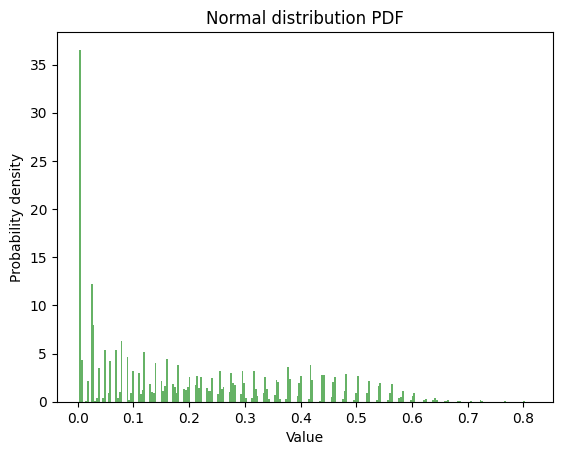

In [15]:
# Plot the PDF of the normal distribution
plt.hist(busca.best_estimator_.predict_proba(teste_normalizado), bins=40, density=True, alpha=0.6, color=['g', 'g', 'g', 'g', 'g'])
plt.xlabel('Value')
plt.ylabel('Probability density')
plt.title('Normal distribution PDF')
plt.show()

In [16]:
y_predito = busca.best_estimator_.predict(teste_normalizado)

In [17]:
f1_score(y_enade_teste, y_predito, average='weighted')

0.4478856936339817

### Feature importances

In [18]:
from sklearn.inspection import permutation_importance

Text(0.5, 0, 'Permutation Importance')

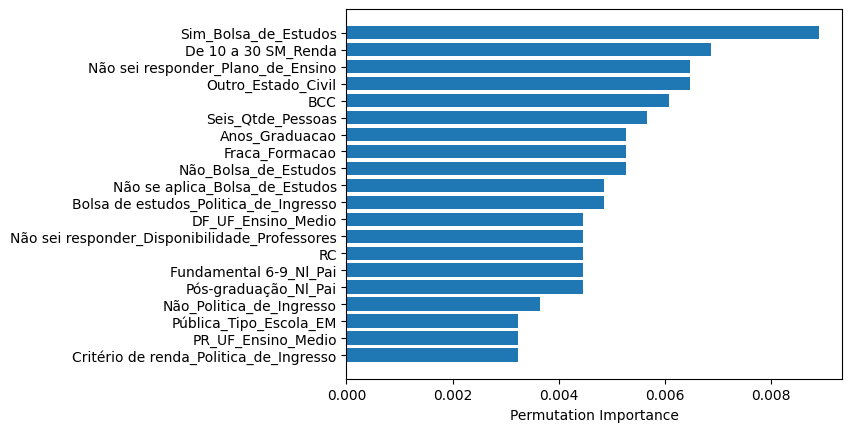

In [23]:
perm_importance = permutation_importance(busca.best_estimator_, teste_normalizado, y_enade_teste)

lista_caracteristicas = enade_treino.columns.values

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(lista_caracteristicas[sorted_idx][-20:], perm_importance.importances_mean[sorted_idx][-20:])
plt.xlabel("Permutation Importance")

In [24]:
df = pd.DataFrame()
df["Alternativas"] = lista_caracteristicas[sorted_idx]
df["Feature_Importances"] = perm_importance.importances_mean[sorted_idx]

In [25]:
df

,Alternativas,Feature_Importances
0,Regular_Formacao,-0.010526
1,"Até 1,5 SM_Renda",-0.009312
2,Nenhuma_Nl_Pai,-0.007692
3,Nenhuma_Nl_Mae,-0.006478
4,Nenhuma_Condicao_Salas,-0.006478
...,...,...
216,BCC,0.006073
217,Outro_Estado_Civil,0.006478
218,Não sei responder_Plano_de_Ensino,0.006478
219,De 10 a 30 SM_Renda,0.006883


In [26]:
df.to_csv(f'../../concept_drift/feature_importances/Publico_Privado/feat_importances_publicos_14-17.csv',index=False)